In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [2]:
CUENCA = 'Atacama'
ISOTOPO = '15N'
MUESTRA = 'suelos'

In [3]:
def select_poligon(df, poligon):
    list_index = []
    for i in range(0, len(df['Latitude'])):
        point = Point((df['Longitude'][i],df['Latitude'][i]))
        if poligon.contains(point):
            list_index.append(i)
    df = df.filter(items = list_index, axis=0)
    return df

In [5]:
df = pd.read_csv('data/training_'+ISOTOPO+'_'+MUESTRA+'.csv')
np.shape(df)

#del df['Unnamed: 0']

df.head()

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,bio13,bio14,bio15,bio16,bio17,bio18,bio19,Latitude,Longitude,15N
0,16.680066,19.940985,73.603150,222.898539,30.221051,3.088484,27.132568,17.506520,18.646753,19.269062,...,4.613,0.0,60.611061,4.751000,0.0,0.000,3.476,-22.85,-69.26,13.55
1,13.945570,16.422479,66.199236,302.465765,26.373077,1.530497,24.842580,13.844643,15.541803,17.465280,...,8.833,0.0,101.518006,9.362000,0.0,2.718,3.804,-23.52,-67.97,2.92
2,17.292080,7.011714,49.380242,201.289604,25.103611,10.860042,14.243569,18.758515,19.791519,20.085420,...,3.282,0.0,34.821223,3.308000,0.0,2.485,1.177,-23.50,-70.54,12.88
3,8.004621,13.752827,67.942430,172.048517,18.357537,-1.905314,20.262851,9.505382,7.752109,10.127124,...,50.704,0.0,190.829799,80.729999,0.0,59.217,1.203,-18.36,-69.56,6.38
4,19.663313,6.021628,46.403303,214.393737,27.463324,14.379219,13.084105,21.727257,22.187209,22.400360,...,0.004,0.0,0.110187,0.004000,0.0,0.000,0.004,-18.40,-70.34,-1.04


In [6]:
df_poligon = pd.read_csv('data/cuencas_poligonos.csv')
atacama_poli = list(eval(df_poligon[CUENCA][0]))
poligon1 = Polygon(atacama_poli)
#poligon2 = Polygon(arica_poli)

In [69]:
df_cuenca = select_poligon(df, poligon1)
#df_cuenca2 = select_poligon(df, poligon2)

#df_cuenca = pd.concat([df_cuenca1, df_cuenca2])

np.shape(df_cuenca)

(51, 22)

In [31]:
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
import models1
from sklearn.metrics import mean_squared_error

In [8]:
X = df_cuenca[df_cuenca.keys()[:-1]].values
y = df_cuenca[ISOTOPO].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape); print(X_test.shape)


(40, 21)
(11, 21)


In [9]:
model1 = models1.ModelTree(X_train, y_train)
model1.fit(2)
y_predict1 = model1.predict(X_test)
reg_1 = linregress(y_test, y_predict1)
mse1 = mean_squared_error(y_test, y_predict1)

In [10]:
model2 = models1.ModelBestRR(X_train, y_train)
model2.fit()
y_predict2 = model2.predict(X_test)
reg_2 = linregress(y_test, y_predict2)
mse2 = mean_squared_error(y_test, y_predict2)

In [11]:
model3 = models1.ModelBestLR(X_train, y_train)
model3.fit()
y_predict3 = model3.predict(X_test)
reg_3 = linregress(y_test, y_predict3)
mse3 = mean_squared_error(y_test, y_predict3)

In [12]:
model4 = models1.ModelForest(X_train, y_train)
model4.fit(5)
y_predict4 = model4.predict(X_test)
reg_4 = linregress(y_test, y_predict4)
mse4 = mean_squared_error(y_test, y_predict4)

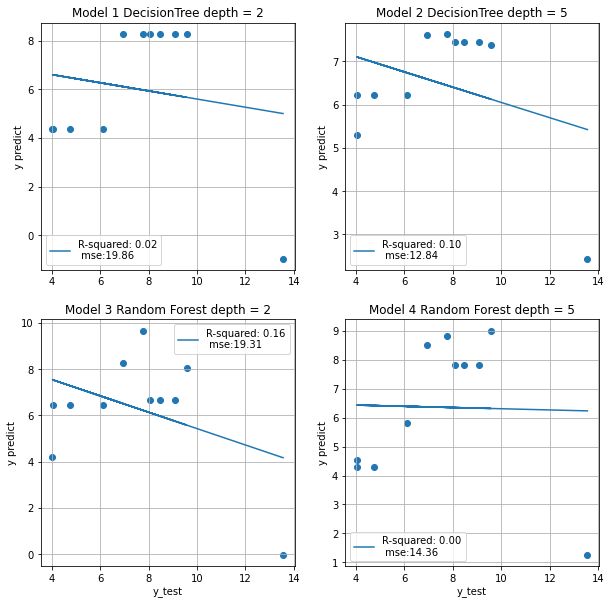

In [13]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(10,10)
fig.suptitle('')

ax[0,0].scatter(y_test, y_predict1)
ax[0,0].plot(y_test, reg_1.intercept + reg_1.slope*y_test, label = f"R-squared: {reg_1.rvalue**2:.2f}\n mse:{mse1:.2f}")
ax[0,0].set_ylabel('y predict')
ax[0,0].set_title('Model 1 DecisionTree depth = 2')
ax[0,0].legend()
ax[0,0].grid(True)

ax[0,1].scatter(y_test, y_predict2)
ax[0,1].plot(y_test, reg_2.intercept + reg_2.slope*y_test, label = f"R-squared: {reg_2.rvalue**2:.2f}\n mse:{mse2:.2f} ")
ax[0,1].set_ylabel('y predict')
ax[0,1].set_title('Model 2 DecisionTree depth = 5')
ax[0,1].legend()
ax[0,1].grid(True)


ax[1,0].scatter(y_test, y_predict3)
ax[1,0].plot(y_test, reg_3.intercept + reg_3.slope*y_test, label = f"R-squared: {reg_3.rvalue**2:.2f}\n mse:{mse3:.2f}")
ax[1,0].set_xlabel('y_test')
ax[1,0].set_ylabel('y predict')
ax[1,0].set_title('Model 3 Random Forest depth = 2')
ax[1,0].legend()
ax[1,0].grid(True)


ax[1,1].scatter(y_test, y_predict4)
ax[1,1].plot(y_test, reg_4.intercept + reg_4.slope*y_test, label = f"R-squared: {reg_4.rvalue**2:.2f}\n mse:{mse4:.2f}")
ax[1,1].set_xlabel('y_test')
ax[1,1].set_ylabel('y predict')
ax[1,1].set_title('Model 4 Random Forest depth = 5')
ax[1,1].legend()
ax[1,1].grid(True)

## BUSCAR EL MEJOR R Y MSE

In [5]:
def training_all(X_train, X_test, y_train, y_test):
    #model 1
    model1 = models1.ModelForest(X_train, y_train)
    model1.fit(10)
    y_predict1 = model1.predict(X_test)
    reg1 = linregress(y_test, y_predict1)
    mse1 = mean_squared_error(y_test, y_predict1)
    
    #model2
    model2 = models1.ModelMLP(X_train, y_train)
    model2.fit('tanh')
    y_predict2 = model2.predict(X_test)
    reg2 = linregress(y_test, y_predict2)
    mse2 = mean_squared_error(y_test, y_predict2)
    
    #model3
    model3 = models1.ModelMLP(X_train, y_train)
    model3.fit('relu')
    y_predict3 = model3.predict(X_test)
    reg3 = linregress(y_test, y_predict3)
    mse3 = mean_squared_error(y_test, y_predict3)
    
    #model4
    model4 = models1.ModelTree(X_train, y_train)
    model4.fit(10)
    y_predict4 = model4.predict(X_test)
    reg4 = linregress(y_test, y_predict4)
    mse4 = mean_squared_error(y_test, y_predict4)

    
    return reg1, mse1, reg2, mse2, reg3, mse3, reg4, mse4
    

In [9]:
lreg1, lmse1, lreg2, lmse2, lreg3, lmse3, lreg4, lmse4 = [],[],[],[],[],[],[],[]

In [16]:
for i in range(0, 50):
    X = df_cuenca[df_cuenca.keys()[:-1]].values
    y = df_cuenca[ISOTOPO].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    reg1, mse1, reg2, mse2, reg3, mse3, reg4, mse4 = training_all(X_train, X_test, y_train, y_test)
    lreg1.append(reg1.rvalue**2)
    lreg2.append(reg2.rvalue**2)
    lreg3.append(reg3.rvalue**2)
    lreg4.append(reg4.rvalue**2)
    lmse1.append(mse1)
    lmse2.append(mse2)
    lmse3.append(mse3)
    lmse4.append(mse4)  


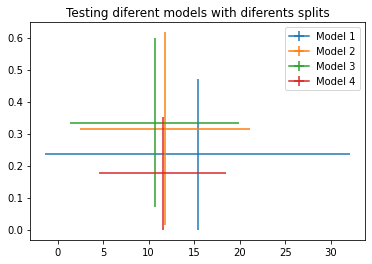

In [17]:
plt.figure()
plt.title('Testing diferent models with diferents splits')
plt.errorbar(np.mean(lmse1), np.mean(lreg1), xerr=np.std(lmse1), yerr=np.std(lreg1), label = 'Model 1')
plt.errorbar(np.mean(lmse2), np.mean(lreg2), xerr=np.std(lmse2), yerr=np.std(lreg2), label = 'Model 2')
plt.errorbar(np.mean(lmse3), np.mean(lreg3), xerr=np.std(lmse3), yerr=np.std(lreg3), label = 'Model 3')
plt.errorbar(np.mean(lmse4), np.mean(lreg4), xerr=np.std(lmse4), yerr=np.std(lreg4), label = 'Model 4')
plt.legend()



## BUSCAR EL MEJOR R Y MSE PARA TODOS LOS VALORES ISOTOPICOS EN UNA CUENCA

In [10]:
df_N_Soil = pd.read_csv('data/training_15N_suelos.csv')
df_N_Plant = pd.read_csv('data/training_15N_plantas.csv')
df_C_Soil = pd.read_csv('data/training_13C_suelos.csv')
df_C_Plant = pd.read_csv('data/training_13C_plantas_del_c4.csv')

del df_N_Plant['Unnamed: 0']
del df_C_Soil['Unnamed: 0'] 
#del df_C_Plant['Unnamed: 0']

df_N_Plant.keys()

Index(['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'Latitude', 'Longitude', '15N'],
      dtype='object')

In [105]:
from shapely.ops import cascaded_union

CUENCA1 = 'Atacama'
#CUENCA2 = 'Atacama'
#CUENCA3 = 'Maule'

df_poligon = pd.read_csv('data/cuencas_poligonos.csv')
poli1 = list(eval(df_poligon[CUENCA1][0]))
poligon1 = Polygon(poli1)
#poli2 = list(eval(df_poligon[CUENCA2][0]))
#poligon2 = Polygon(poli2)
#poli3 = list(eval(df_poligon[CUENCA3][0]))
#poligon3 = Polygon(poli3)

#polygons = [poligon1, poligon2]
 
#poligon1 = cascaded_union(polygons)

In [82]:
df_N_Soil = select_poligon(df_N_Soil, poligon1)
df_N_Plant = select_poligon(df_N_Plant, poligon1)
df_C_Soil = select_poligon(df_C_Soil, poligon1)
df_C_Plant = select_poligon(df_C_Plant, poligon1)

df_N_Soil = df_N_Soil.rename(columns={'15N': 'iso'})
df_N_Plant = df_N_Plant.rename(columns={'15N': 'iso'})
df_C_Soil = df_C_Soil.rename(columns={'13C': 'iso'})
df_C_Plant = df_C_Plant.rename(columns={'13C': 'iso'})

In [83]:
df_C_Plant


,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,bio19,Latitude,Longitude,Atacama,Arica,La_Serena,Santiago,Maule,Norte,Sur
0,6.781648,15.527605,64.495400,315.088335,18.892970,-5.208931,24.101900,7.670747,5.421298,10.601182,...,5.231,-23.62620,-67.83494,1,0,0,0,0,1,0
1,9.512859,15.834781,65.535805,301.691065,21.585223,-2.604458,24.189681,10.048056,10.776731,13.103045,...,3.642,-23.61002,-67.87349,1,0,0,0,0,1,0
2,6.781648,15.527605,64.495400,315.088335,18.892970,-5.208931,24.101900,7.670747,5.421298,10.601182,...,5.231,-23.62620,-67.83494,1,0,0,0,0,1,0
3,17.292080,7.011714,49.380242,201.289604,25.103611,10.860042,14.243569,18.758515,19.791519,20.085420,...,1.177,-23.50000,-70.54000,1,0,0,0,0,1,0
4,6.781648,15.527605,64.495400,315.088335,18.892970,-5.208931,24.101900,7.670747,5.421298,10.601182,...,5.231,-23.62620,-67.83494,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,12.038672,16.763555,65.722538,309.191692,24.804771,-0.748970,25.553741,12.872052,13.313552,15.692158,...,4.011,-23.31010,-67.90332,1,0,0,0,0,1,0
87,12.038672,16.763555,65.722538,309.191692,24.804771,-0.748970,25.553741,12.872052,13.313552,15.692158,...,4.011,-23.31010,-67.90332,1,0,0,0,0,1,0
88,12.211395,16.534840,65.458966,309.961697,24.852219,-0.460659,25.312878,13.141618,13.543899,15.876641,...,4.013,-23.28868,-67.94587,1,0,0,0,0,1,0
119,12.243757,17.009266,66.644101,300.973971,24.675107,-0.879920,25.555027,10.612815,14.214203,15.769225,...,5.549,-23.96888,-68.14908,1,0,0,0,0,1,0


In [108]:
data = []

for df_cuenca in [df_N_Soil, df_N_Plant, df_C_Soil, df_C_Plant]:
    lreg1, lmse1, lreg2, lmse2, lreg3, lmse3, lreg4, lmse4 = [],[],[],[],[],[],[],[]
    for i in range(0, 80):
        X = df_cuenca[df_cuenca.keys()[:-1]].values
        y = df_cuenca['iso'].values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        reg1, mse1, reg2, mse2, reg3, mse3, reg4, mse4 = training_all(X_train, X_test, y_train, y_test)
        lreg1.append(reg1.rvalue**2)
        lreg2.append(reg2.rvalue**2)
        lreg3.append(reg3.rvalue**2)
        lreg4.append(reg4.rvalue**2)
        lmse1.append(mse1)
        lmse2.append(mse2)
        lmse3.append(mse3)
        lmse4.append(mse4)
        
    data.append([lreg1, lmse1, lreg2, lmse2, lreg3, lmse3, lreg4, lmse4])
    

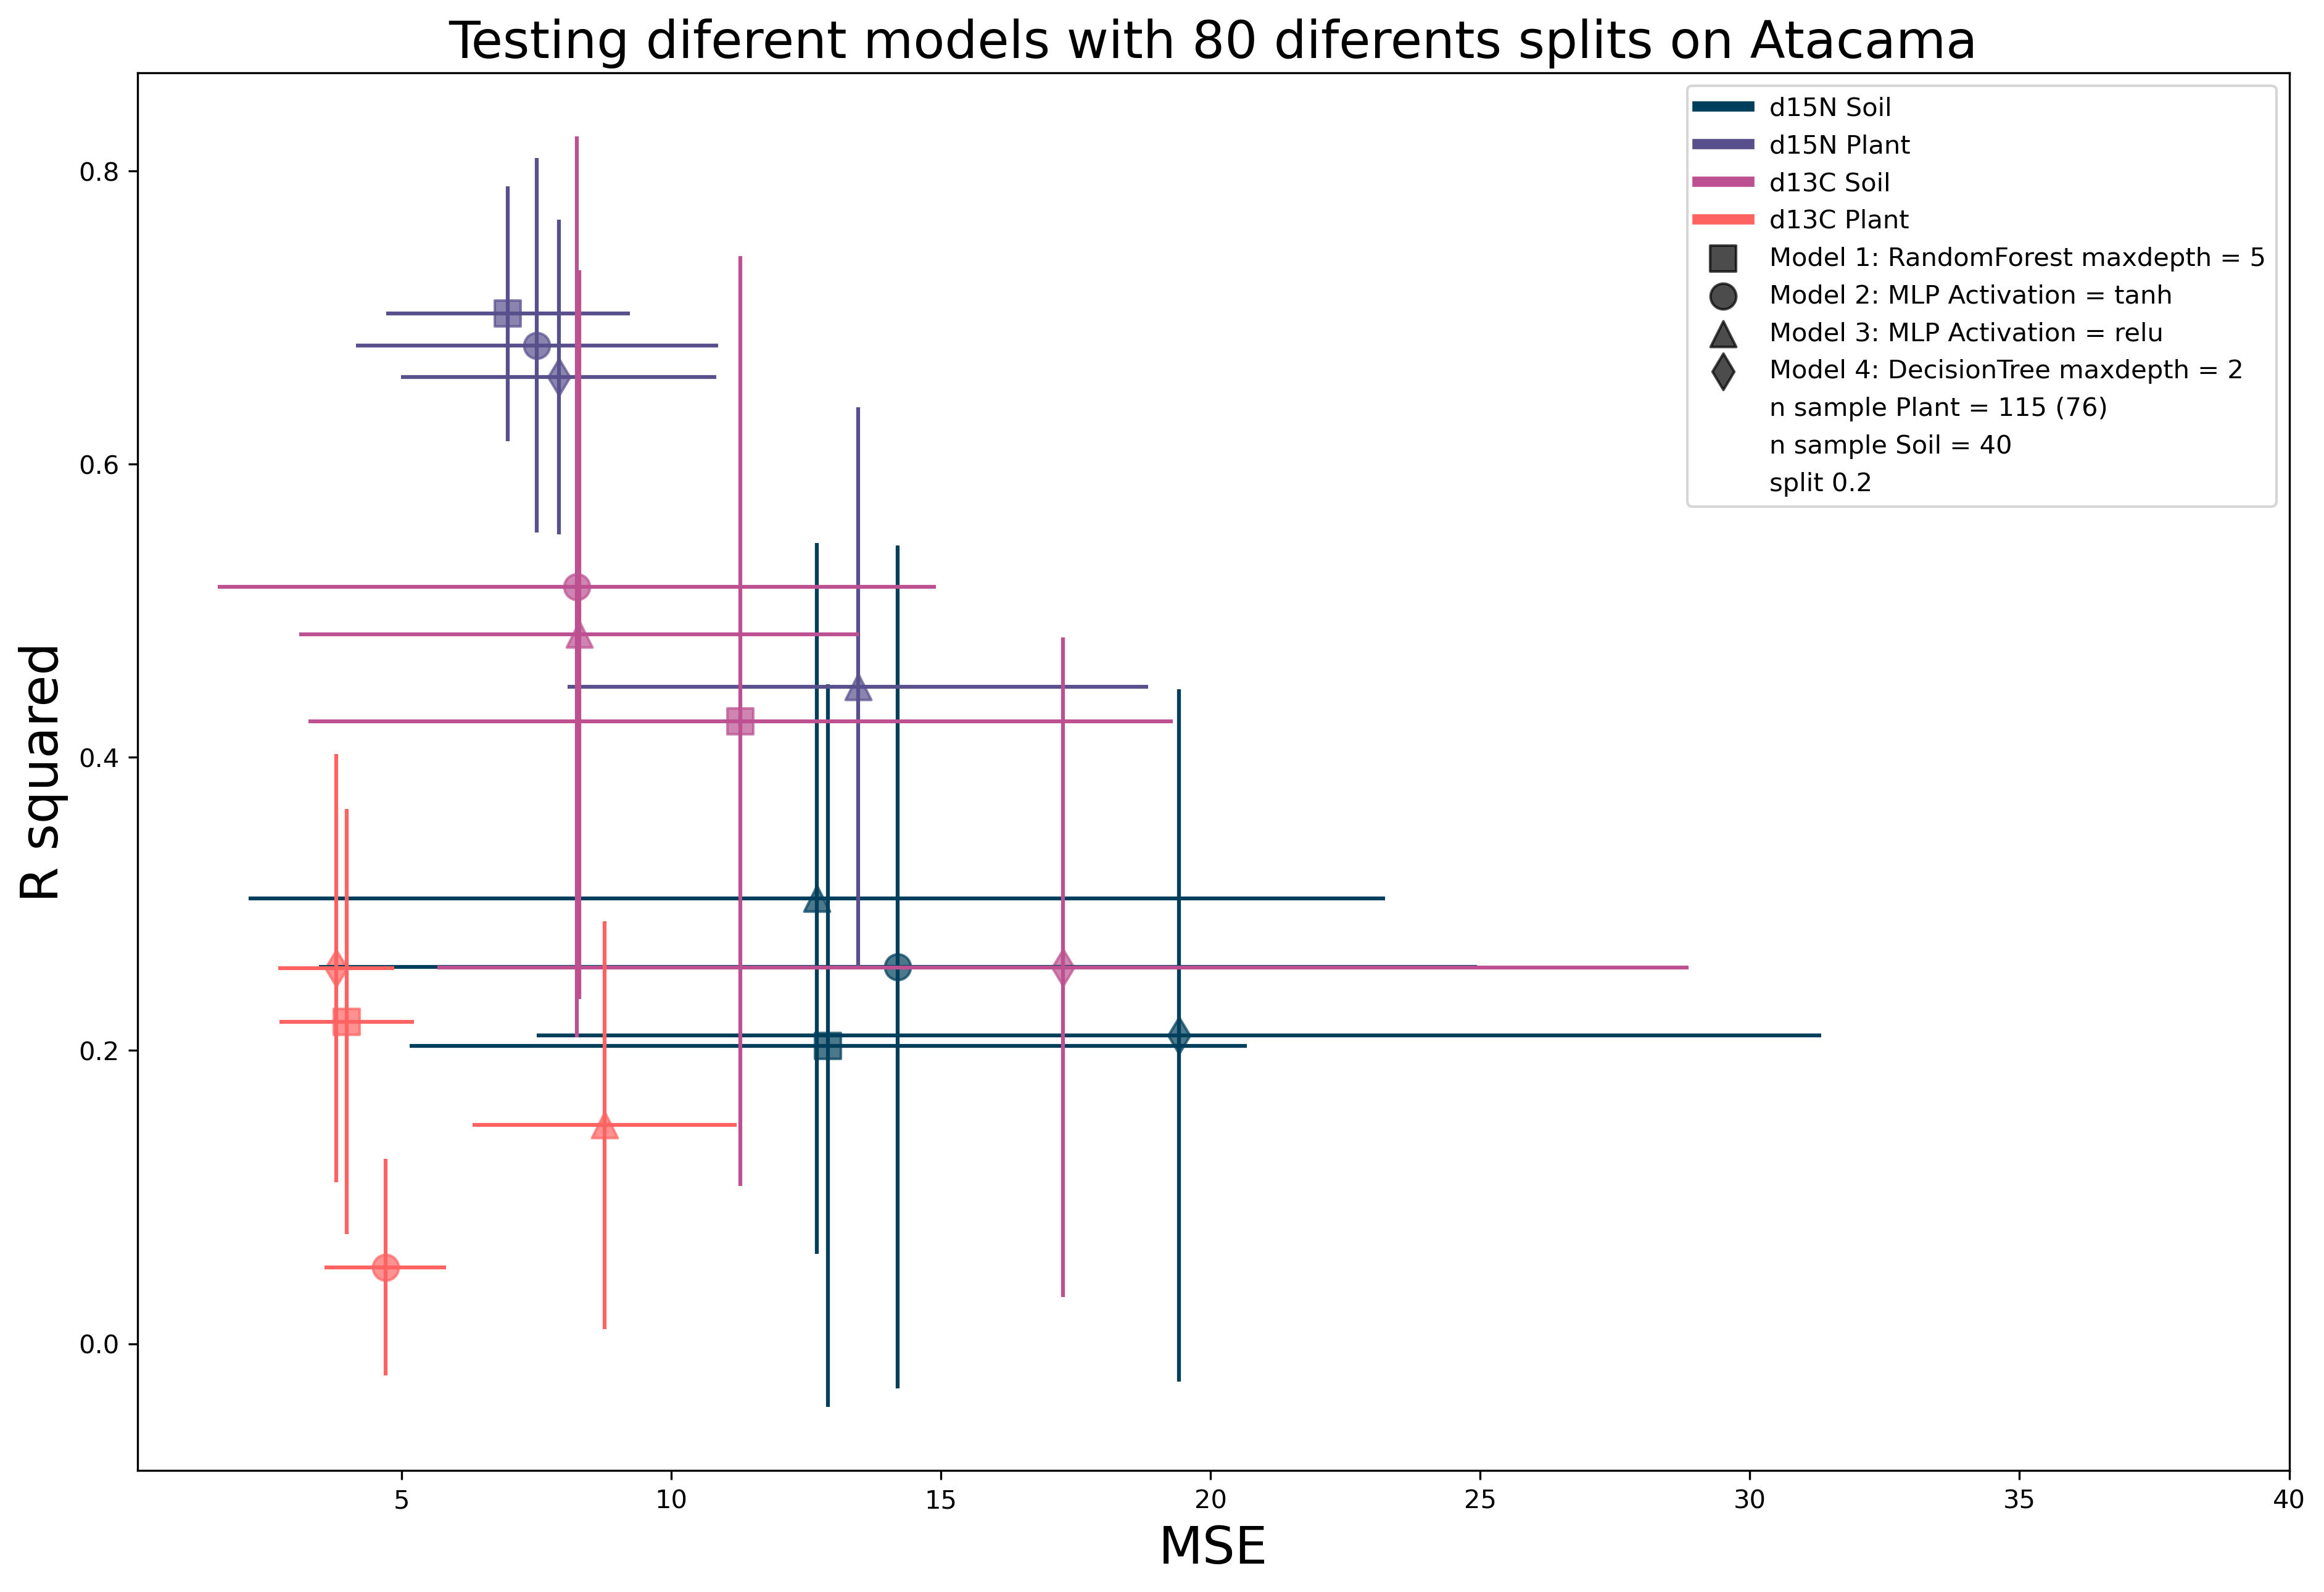

In [109]:
plt.figure(figsize=(15, 10), dpi=300)
plt.title('Testing diferent models with 80 diferents splits on Atacama', fontsize = 20)######################
color = ['#003f5c', '#58508d', '#bc5090', '#ff6361']
for i in range(0, 4):
    plt.errorbar(np.mean(data[i][1]), np.mean(data[i][0]), xerr=np.std(data[i][1]), yerr=np.std(data[i][0]), c= color[i])
    plt.errorbar(np.mean(data[i][3]), np.mean(data[i][2]), xerr=np.std(data[i][3]), yerr=np.std(data[i][2]), c= color[i])
    plt.errorbar(np.mean(data[i][5]), np.mean(data[i][4]), xerr=np.std(data[i][5]), yerr=np.std(data[i][4]), c= color[i])
    plt.errorbar(np.mean(data[i][7]), np.mean(data[i][6]), xerr=np.std(data[i][7]), yerr=np.std(data[i][6]), c= color[i])
    plt.scatter(np.mean(data[i][1]), np.mean(data[i][0]),c= color[i], marker = 's', s=100, alpha = 0.7)
    plt.scatter(np.mean(data[i][3]), np.mean(data[i][2]), c= color[i], marker = 'o', s=100, alpha = 0.7)
    plt.scatter(np.mean(data[i][5]), np.mean(data[i][4]), c= color[i], marker = '^', s=100, alpha = 0.7)
    plt.scatter(np.mean(data[i][7]), np.mean(data[i][6]), c= color[i], marker = 'd', s=100, alpha = 0.7)

plt.scatter([],[], label = 'Model 1: RandomForest maxdepth = 5', c= 'black', marker = 's', s=100, alpha = 0.7)
plt.scatter([],[], label = 'Model 2: MLP Activation = tanh', c= 'black', marker = 'o', s=100, alpha = 0.7)
plt.scatter([],[], label = 'Model 3: MLP Activation = relu', c= 'black', marker = '^', s=100, alpha = 0.7)
plt.scatter([],[], label = 'Model 4: DecisionTree maxdepth = 2', c= 'black', marker = 'd', s=100, alpha = 0.7)
plt.plot([],[], label = 'd15N Soil', c= '#003f5c', linewidth=4)
plt.plot([],[], label = 'd15N Plant', c= '#58508d', linewidth=4)
plt.plot([],[], label = 'd13C Soil', c= '#bc5090', linewidth=4)
plt.plot([],[], label = 'd13C Plant', c= '#ff6361', linewidth=4)
plt.scatter([],[],c= 'w', label = 'n sample Plant = 115 (76)')###################
plt.scatter([],[],c= 'w', label = 'n sample Soil = 40')#################
plt.scatter([],[],c= 'w', label = 'split 0.2')#################


plt.xlabel('MSE', fontsize = 20)
plt.ylabel('R squared', fontsize = 20)
plt.xlim(right=40)
plt.legend()
plt.savefig('Atacama_testing_020_sinc4.png')####################################################################

## BUSCAR EL MEJOR R Y MSE PARA TODOS LOS VALORES ISOTOPICOS EN TODA LA REGION CON VARIABLES DE CLUSTER AGREGADAS

In [8]:
df_N_Soil = pd.read_csv('data/training_15N_suelos_v3.csv')
df_N_Plant = pd.read_csv('data/training_15N_plantas_v2.csv')
df_C_Soil = pd.read_csv('data/training_13C_suelos_v2.csv')
df_C_Plant = pd.read_csv('data/training_13C_plantas_v2.csv')

In [9]:
df_C_Plant

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,Latitude,Longitude,13C,Atacama,Arica,La_Serena,Santiago,Maule,Norte,Sur
0,6.781648,15.527605,64.495400,315.088335,18.892970,-5.208931,24.101900,7.670747,5.421298,10.601182,...,-23.62620,-67.83494,-21.40,1,0,0,0,0,1,0
1,9.512859,15.834781,65.535805,301.691065,21.585223,-2.604458,24.189681,10.048056,10.776731,13.103045,...,-23.61002,-67.87349,-23.21,1,0,0,0,0,1,0
2,6.781648,15.527605,64.495400,315.088335,18.892970,-5.208931,24.101900,7.670747,5.421298,10.601182,...,-23.62620,-67.83494,-22.91,1,0,0,0,0,1,0
3,17.292080,7.011714,49.380242,201.289604,25.103611,10.860042,14.243569,18.758515,19.791519,20.085420,...,-23.50000,-70.54000,-25.43,1,0,0,0,0,1,0
4,6.781648,15.527605,64.495400,315.088335,18.892970,-5.208931,24.101900,7.670747,5.421298,10.601182,...,-23.62620,-67.83494,-22.11,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,14.121252,13.251624,56.089936,355.066326,26.990337,3.313603,23.676734,9.829689,17.174319,18.535722,...,-31.36360,-71.10480,-27.62,0,0,1,0,0,0,1
123,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,-31.87777,-71.15838,-26.78,0,0,1,0,0,0,1
124,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,-31.87777,-71.15838,-27.75,0,0,1,0,0,0,1
125,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,-31.87777,-71.15838,-28.47,0,0,1,0,0,0,1


In [10]:
df_N_Soil = df_N_Soil.rename(columns={'15N': 'iso'})
df_N_Plant = df_N_Plant.rename(columns={'15N': 'iso'})
df_C_Soil = df_C_Soil.rename(columns={'13C': 'iso'})
df_C_Plant = df_C_Plant.rename(columns={'13C': 'iso'})



In [11]:
data = []

for df_cuenca in [df_N_Soil, df_N_Plant, df_C_Soil, df_C_Plant]:
    
    lreg1, lmse1, lreg2, lmse2, lreg3, lmse3, lreg4, lmse4 = [],[],[],[],[],[],[],[]
    y = df_cuenca['iso'].values
    dff = df_cuenca
    del dff['iso']
    X = dff[dff.keys()].values
    for i in tqdm(range(0, 10)):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
        reg1, mse1, reg2, mse2, reg3, mse3, reg4, mse4 = training_all(X_train, X_test, y_train, y_test)
        lreg1.append(reg1.rvalue**2)
        lreg2.append(reg2.rvalue**2)
        lreg3.append(reg3.rvalue**2)
        lreg4.append(reg4.rvalue**2)
        lmse1.append(mse1)
        lmse2.append(mse2)
        lmse3.append(mse3)
        lmse4.append(mse4)
        
    data.append([lreg1, lmse1, lreg2, lmse2, lreg3, lmse3, lreg4, lmse4])

<ipython-input-11-b40aae6d3f94>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0, 10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-11-b40aae6d3f94>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0, 10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-11-b40aae6d3f94>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0, 10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-11-b40aae6d3f94>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0, 10)):


  0%|          | 0/10 [00:00<?, ?it/s]

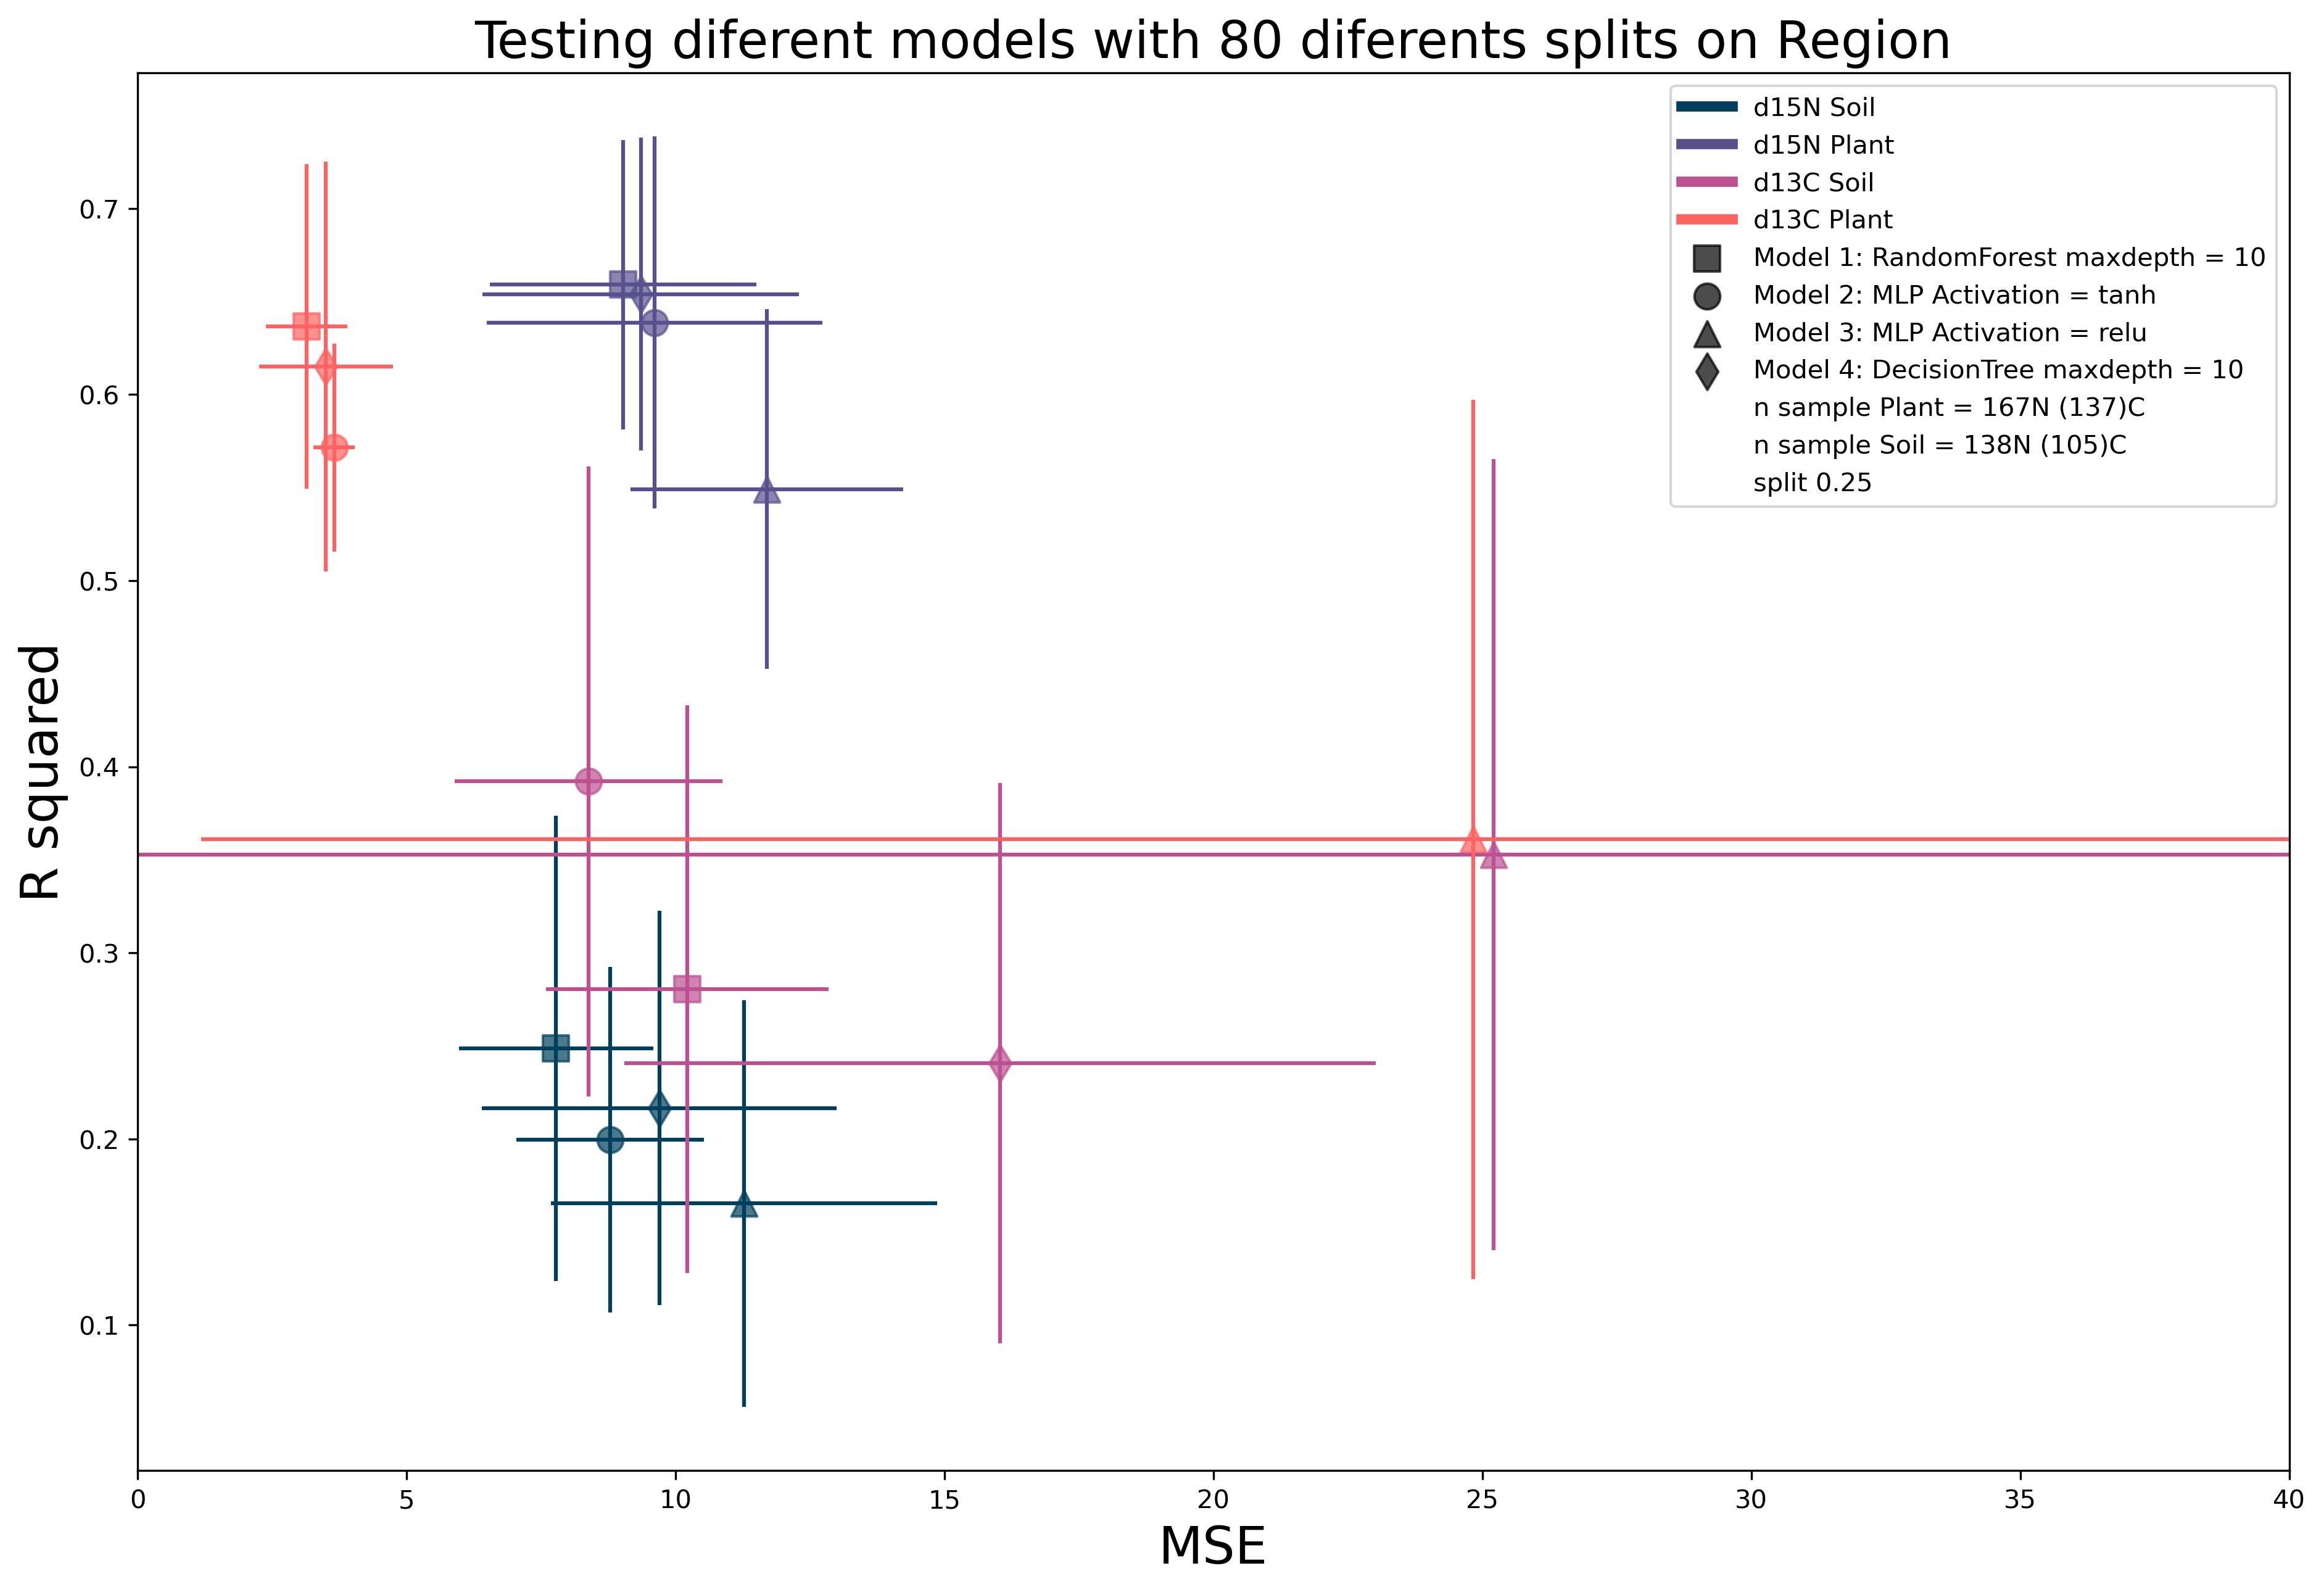

In [12]:
plt.figure(figsize=(15, 10), dpi=300)
plt.title('Testing diferent models with 80 diferents splits on Region', fontsize = 20)######################
color = ['#003f5c', '#58508d', '#bc5090', '#ff6361']
for i in range(0, 4):
    plt.errorbar(np.mean(data[i][1]), np.mean(data[i][0]), xerr=np.std(data[i][1]), yerr=np.std(data[i][0]), c= color[i])
    plt.errorbar(np.mean(data[i][3]), np.mean(data[i][2]), xerr=np.std(data[i][3]), yerr=np.std(data[i][2]), c= color[i])
    plt.errorbar(np.mean(data[i][5]), np.mean(data[i][4]), xerr=np.std(data[i][5]), yerr=np.std(data[i][4]), c= color[i])
    plt.errorbar(np.mean(data[i][7]), np.mean(data[i][6]), xerr=np.std(data[i][7]), yerr=np.std(data[i][6]), c= color[i])
    plt.scatter(np.mean(data[i][1]), np.mean(data[i][0]),c= color[i], marker = 's', s=100, alpha = 0.7)
    plt.scatter(np.mean(data[i][3]), np.mean(data[i][2]), c= color[i], marker = 'o', s=100, alpha = 0.7)
    plt.scatter(np.mean(data[i][5]), np.mean(data[i][4]), c= color[i], marker = '^', s=100, alpha = 0.7)
    plt.scatter(np.mean(data[i][7]), np.mean(data[i][6]), c= color[i], marker = 'd', s=100, alpha = 0.7)

plt.scatter([],[], label = 'Model 1: RandomForest maxdepth = 10', c= 'black', marker = 's', s=100, alpha = 0.7)
plt.scatter([],[], label = 'Model 2: MLP Activation = tanh', c= 'black', marker = 'o', s=100, alpha = 0.7)
plt.scatter([],[], label = 'Model 3: MLP Activation = relu', c= 'black', marker = '^', s=100, alpha = 0.7)
plt.scatter([],[], label = 'Model 4: DecisionTree maxdepth = 10', c= 'black', marker = 'd', s=100, alpha = 0.7)
plt.plot([],[], label = 'd15N Soil', c= '#003f5c', linewidth=4)
plt.plot([],[], label = 'd15N Plant', c= '#58508d', linewidth=4)
plt.plot([],[], label = 'd13C Soil', c= '#bc5090', linewidth=4)
plt.plot([],[], label = 'd13C Plant', c= '#ff6361', linewidth=4)
plt.scatter([],[],c= 'w', label = 'n sample Plant = 167N (137)C')###################
plt.scatter([],[],c= 'w', label = 'n sample Soil = 138N (105)C')#################
plt.scatter([],[],c= 'w', label = 'split 0.25')#################


plt.xlabel('MSE', fontsize = 20)
plt.ylabel('R squared', fontsize = 20)
plt.xlim(0, 40)
plt.legend()
plt.savefig('Region_testing_025_depth10.png')####################################################################

<!--The Game-->

### BUSCAR EL MEJOR R Y MSE PARA UN MODELO UNIFICADO

In [21]:
df = pd.read_csv('data/training_All_v1.csv')

In [22]:
from sklearn import preprocessing

In [23]:
df.columns

Index(['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19', 'Latitude', 'Longitude', 'iso', 'Atacama', 'Arica',
       'La_Serena', 'Santiago', 'Maule', 'Norte', 'Sur', 'suelo', 'planta',
       'N', 'C'],
      dtype='object')

In [26]:
df_ = df[['bio1', 'bio2', 'bio3', 'bio4', 'bio5', 'bio6', 'bio7', 'bio8', 'bio9',
       'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17',
       'bio18', 'bio19','suelo',
       'N', 'iso']]

In [29]:
df_

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,bio13,bio14,bio15,bio16,bio17,bio18,bio19,suelo,N,iso
0,16.680066,19.940985,73.603150,222.898539,30.221051,3.088484,27.132568,17.506520,18.646753,19.269062,...,4.613000,0.0,60.611061,4.751000,0.0,0.000,3.476000,1,1,13.55
1,13.945570,16.422479,66.199236,302.465765,26.373077,1.530497,24.842580,13.844643,15.541803,17.465280,...,8.833000,0.0,101.518006,9.362000,0.0,2.718,3.804000,1,1,2.92
2,17.292080,7.011714,49.380242,201.289604,25.103611,10.860042,14.243569,18.758515,19.791519,20.085420,...,3.282000,0.0,34.821223,3.308000,0.0,2.485,1.177000,1,1,12.88
3,8.004621,13.752827,67.942430,172.048517,18.357537,-1.905314,20.262851,9.505382,7.752109,10.127124,...,50.704000,0.0,190.829799,80.729999,0.0,59.217,1.203000,1,1,6.38
4,19.663313,6.021628,46.403303,214.393737,27.463324,14.379219,13.084105,21.727257,22.187209,22.400360,...,0.004000,0.0,0.110187,0.004000,0.0,0.000,0.004000,1,1,-1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,14.121252,13.251624,56.089936,355.066326,26.990337,3.313603,23.676734,9.829689,17.174319,18.535722,...,77.945000,0.0,171.600108,124.437000,0.0,2.510,104.466999,0,0,-27.62
534,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,86.294001,0.0,165.229213,144.814000,0.0,2.300,124.524000,0,0,-26.78
535,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,86.294001,0.0,165.229213,144.814000,0.0,2.300,124.524000,0,0,-27.75
536,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,86.294001,0.0,165.229213,144.814000,0.0,2.300,124.524000,0,0,-28.47


In [57]:
df

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,...,Arica,La_Serena,Santiago,Maule,Norte,Sur,suelo,planta,N,C
0,16.680066,19.940985,73.603150,222.898539,30.221051,3.088484,27.132568,17.506520,18.646753,19.269062,...,0,0,0,0,1,0,1,0,1,0
1,13.945570,16.422479,66.199236,302.465765,26.373077,1.530497,24.842580,13.844643,15.541803,17.465280,...,0,0,0,0,1,0,1,0,1,0
2,17.292080,7.011714,49.380242,201.289604,25.103611,10.860042,14.243569,18.758515,19.791519,20.085420,...,0,0,0,0,1,0,1,0,1,0
3,8.004621,13.752827,67.942430,172.048517,18.357537,-1.905314,20.262851,9.505382,7.752109,10.127124,...,1,0,0,0,1,0,1,0,1,0
4,19.663313,6.021628,46.403303,214.393737,27.463324,14.379219,13.084105,21.727257,22.187209,22.400360,...,0,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,14.121252,13.251624,56.089936,355.066326,26.990337,3.313603,23.676734,9.829689,17.174319,18.535722,...,0,1,0,0,0,1,0,1,0,1
534,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,0,1,0,0,0,1,0,1,0,1
535,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,0,1,0,0,0,1,0,1,0,1
536,14.781758,14.284080,57.344513,352.678578,28.363834,3.405418,24.958416,10.496199,18.252404,19.212604,...,0,1,0,0,0,1,0,1,0,1


In [32]:
from tqdm import tqdm_notebook as tqdm

In [89]:
lev1, lev2, lev3, lev4 = [],[],[],[]
for i in tqdm(range(0, 50)):
    X = df_[df_.keys()[:-1]]
    y = df_['iso']
    X_train, X_test, y_train, y_test, indice_test = split(X, y)
    ev1, ev2, ev3, ev4 = training_all(X_train, X_test, y_train, y_test, indice_test, df)
    lev1.append(ev1)
    lev2.append(ev2)
    lev3.append(ev3)
    lev4.append(ev4)

<ipython-input-89-3d24c52153db>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0, 50)):


  0%|          | 0/50 [00:00<?, ?it/s]

In [91]:
lev1[:2]

[[0.6437092357522066,
  3.486171461209784,
  0.5975563632387506,
  9.41563303696912,
  0.5706359906925561,
  4.946367141373212,
  0.11124279581730556,
  10.601459825820342],
 [0.575488588191184,
  3.6810312500599065,
  0.6794110580580544,
  6.012111927247583,
  0.2832749478991031,
  6.916625805571135,
  0.17452805573365232,
  8.494083283512841]]

In [93]:
lev1 = np.transpose(np.array(lev1))
lev2 = np.transpose(np.array(lev2))
lev3 = np.transpose(np.array(lev3))
lev4 = np.transpose(np.array(lev4))

In [94]:
lev1[:2]

array([[ 0.64370924,  0.57548859,  0.5611551 ,  0.68485441,  0.62297221,
         0.33099237,  0.46056302,  0.57552477,  0.24621276,  0.65588429,
         0.52400982,  0.54519102,  0.58245416,  0.47190855,  0.62941179,
         0.30039998,  0.57855117,  0.55854502,  0.53676713,  0.20852696,
         0.50527791,  0.57337383,  0.66467512,  0.59878212,  0.54716421,
         0.57206793,  0.28535033,  0.26938921,  0.54472794,  0.49581537,
         0.64443743,  0.48645264,  0.44889465,  0.43242055,  0.59964201,
         0.61755012,  0.52355245,  0.4381289 ,  0.36131106,  0.48065163,
         0.53850701,  0.45854854,  0.51333856,  0.40146724,  0.31936961,
         0.47098492,  0.41144532,  0.49689157,  0.23188632,  0.57674002],
       [ 3.48617146,  3.68103125,  3.47726231,  3.27875668,  3.03079567,
         5.4447642 ,  4.47756336,  3.29076582, 10.2915949 ,  3.54510336,
         3.73162421,  4.45724239,  4.78376047,  5.14847715,  3.0317498 ,
         5.50505462,  3.42821582,  3.71046615,  4.

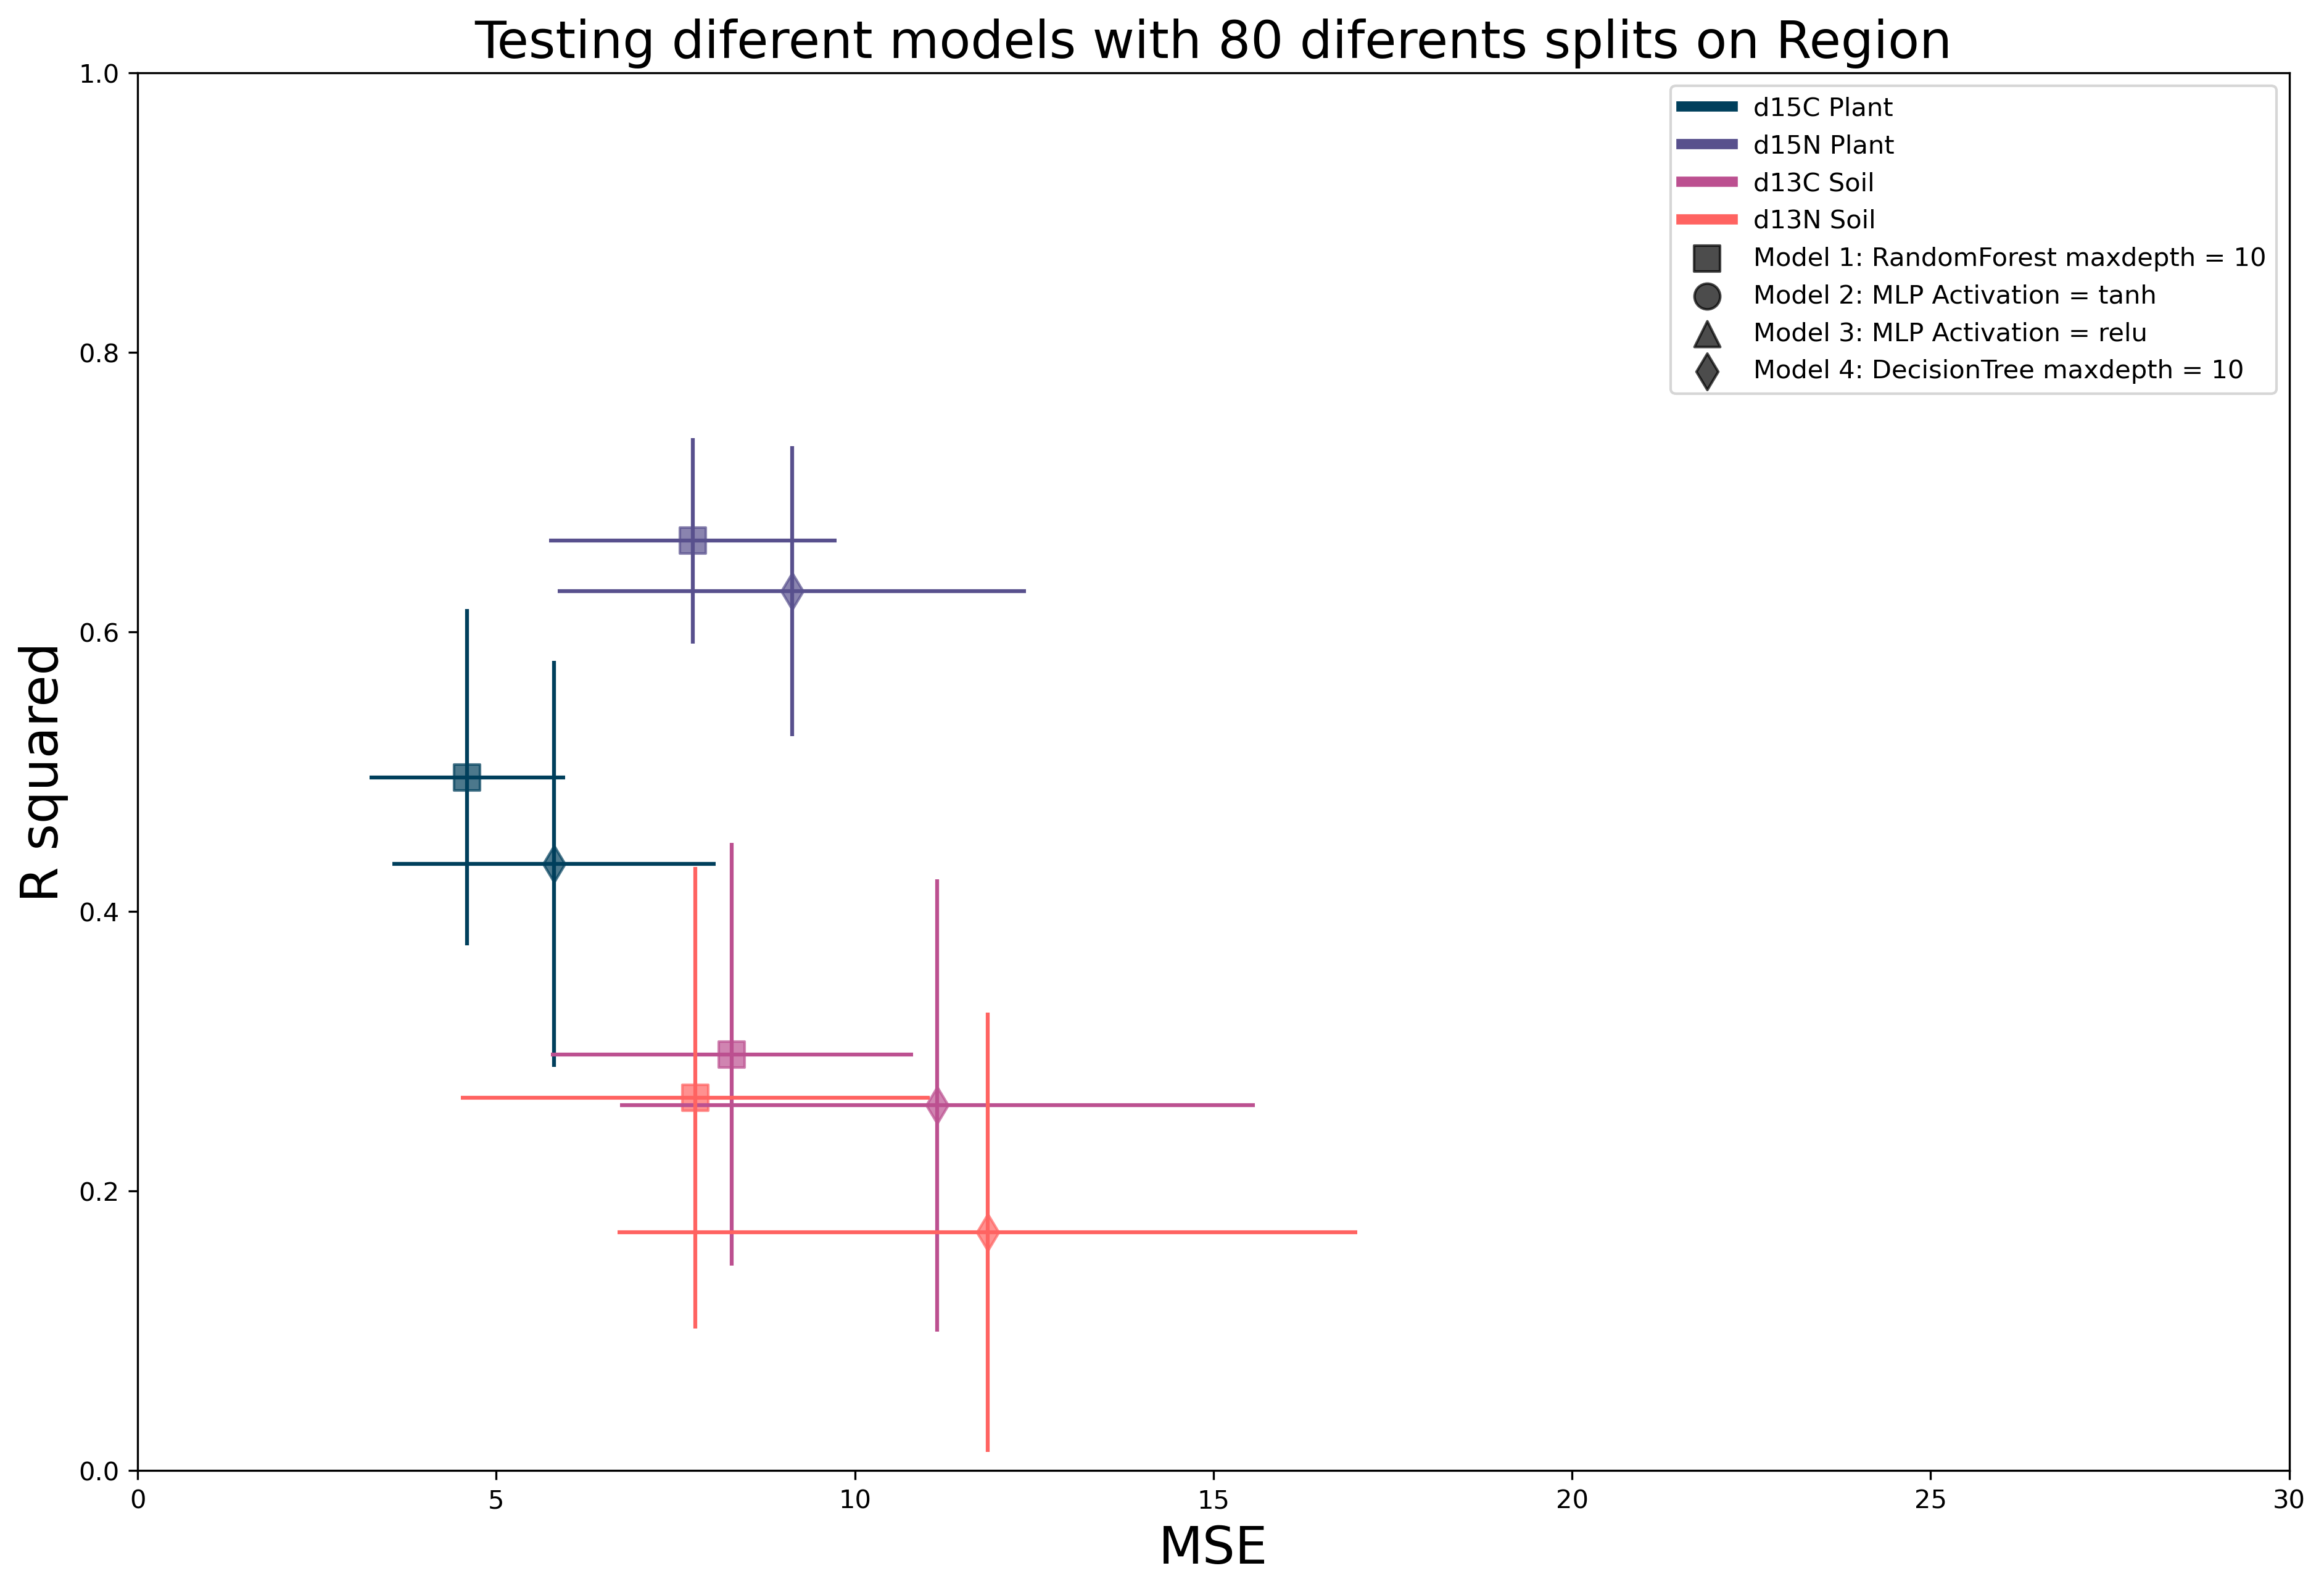

In [95]:
plt.figure(figsize=(15, 10), dpi=300)
plt.title('Testing diferent models with 80 diferents splits on Region', fontsize = 20)######################
color = ['#003f5c','#003f5c',
         '#58508d','#58508d',
         '#bc5090','#bc5090',
         '#ff6361','#ff6361']

for i in [0,2,4,6]:
    lreg1, lmse1, lreg2, lmse2, lreg3, lmse3, lreg4, lmse4 = lev1[i], lev1[i+1], lev2[i], lev2[i+1],lev3[i], lev3[i+1],lev4[i], lev4[i+1]
    plt.errorbar(np.mean(lmse1), np.mean(lreg1), xerr=np.std(lmse1), yerr=np.std(lreg1), c= color[i])
    plt.errorbar(np.mean(lmse2), np.mean(lreg2), xerr=np.std(lmse2), yerr=np.std(lreg2), c= color[i])
    plt.errorbar(np.mean(lmse3), np.mean(lreg3), xerr=np.std(lmse3), yerr=np.std(lreg3), c= color[i])
    plt.errorbar(np.mean(lmse4), np.mean(lreg4), xerr=np.std(lmse4), yerr=np.std(lreg4), c= color[i])
    plt.scatter(np.mean(lmse1), np.mean(lreg1),c= color[i], marker = 's', s=100, alpha = 0.7)
    plt.scatter(np.mean(lmse2), np.mean(lreg2), c= color[i], marker = 'o', s=100, alpha = 0.7)
    plt.scatter(np.mean(lmse3), np.mean(lreg3), c= color[i], marker = '^', s=100, alpha = 0.7)
    plt.scatter(np.mean(lmse4), np.mean(lreg4), c= color[i], marker = 'd', s=100, alpha = 0.7)

plt.scatter([],[], label = 'Model 1: RandomForest maxdepth = 10', c= 'black', marker = 's', s=100, alpha = 0.7)
plt.scatter([],[], label = 'Model 2: MLP Activation = tanh', c= 'black', marker = 'o', s=100, alpha = 0.7)
plt.scatter([],[], label = 'Model 3: MLP Activation = relu', c= 'black', marker = '^', s=100, alpha = 0.7)
plt.scatter([],[], label = 'Model 4: DecisionTree maxdepth = 10', c= 'black', marker = 'd', s=100, alpha = 0.7)

plt.plot([],[], label = 'd15C Plant', c= '#003f5c', linewidth=4)
plt.plot([],[], label = 'd15N Plant', c= '#58508d', linewidth=4)
plt.plot([],[], label = 'd13C Soil', c= '#bc5090', linewidth=4)
plt.plot([],[], label = 'd13N Soil', c= '#ff6361', linewidth=4)


plt.xlabel('MSE', fontsize = 20)
plt.ylabel('R squared', fontsize = 20)
plt.xlim(0,30)
plt.ylim(0,1)
plt.legend()
plt.savefig('final_training.png')####################################################################
plt.show()

In [19]:
np.std(lreg1)

0.0050451676302900325

In [113]:
#model 1
model1 = models1.ModelForest(X_train, y_train)
model1.fit(10)
y_predict1 = model1.predict(X_test)

mask = y_test
reg_1 = linregress(y_test, y_predict1)
mse_1 = mean_squared_error(y_test, y_predict1)

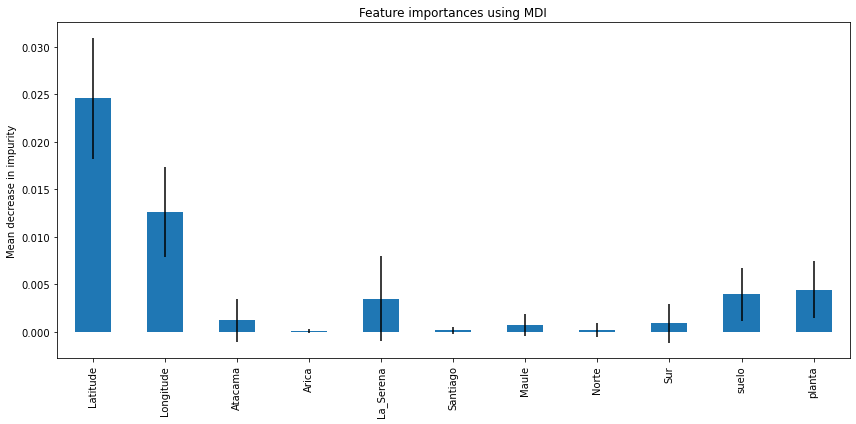

In [114]:
import pandas as pd
import time

start_time = time.time()
importances = model1.model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model1.model.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances[:-2], index=df.keys()[:-3])

fig, ax = plt.subplots(figsize=(12,6))
forest_importances.plot.bar(yerr=std[:-2], ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig('importances.png')

In [45]:
importances

array([4.97967498e-04, 1.39387505e-03, 2.22813787e-03, 2.26371392e-03,
       2.19001000e-03, 5.92954352e-04, 2.28796184e-03, 8.53829989e-04,
       7.47890170e-04, 6.83179267e-04, 4.90953081e-04, 1.05108954e-03,
       1.34161677e-03, 1.07225105e-04, 3.97637987e-03, 1.07504623e-03,
       4.71930246e-04, 1.45161434e-03, 8.26755301e-03, 5.91599654e-03,
       5.06442495e-03, 1.34230666e-04, 1.55624337e-05, 1.73381923e-04,
       2.68112428e-05, 1.42250013e-04, 2.69015301e-04, 4.95821823e-04,
       3.37434600e-03, 3.54544292e-03, 5.31290468e-01, 4.17579320e-01])

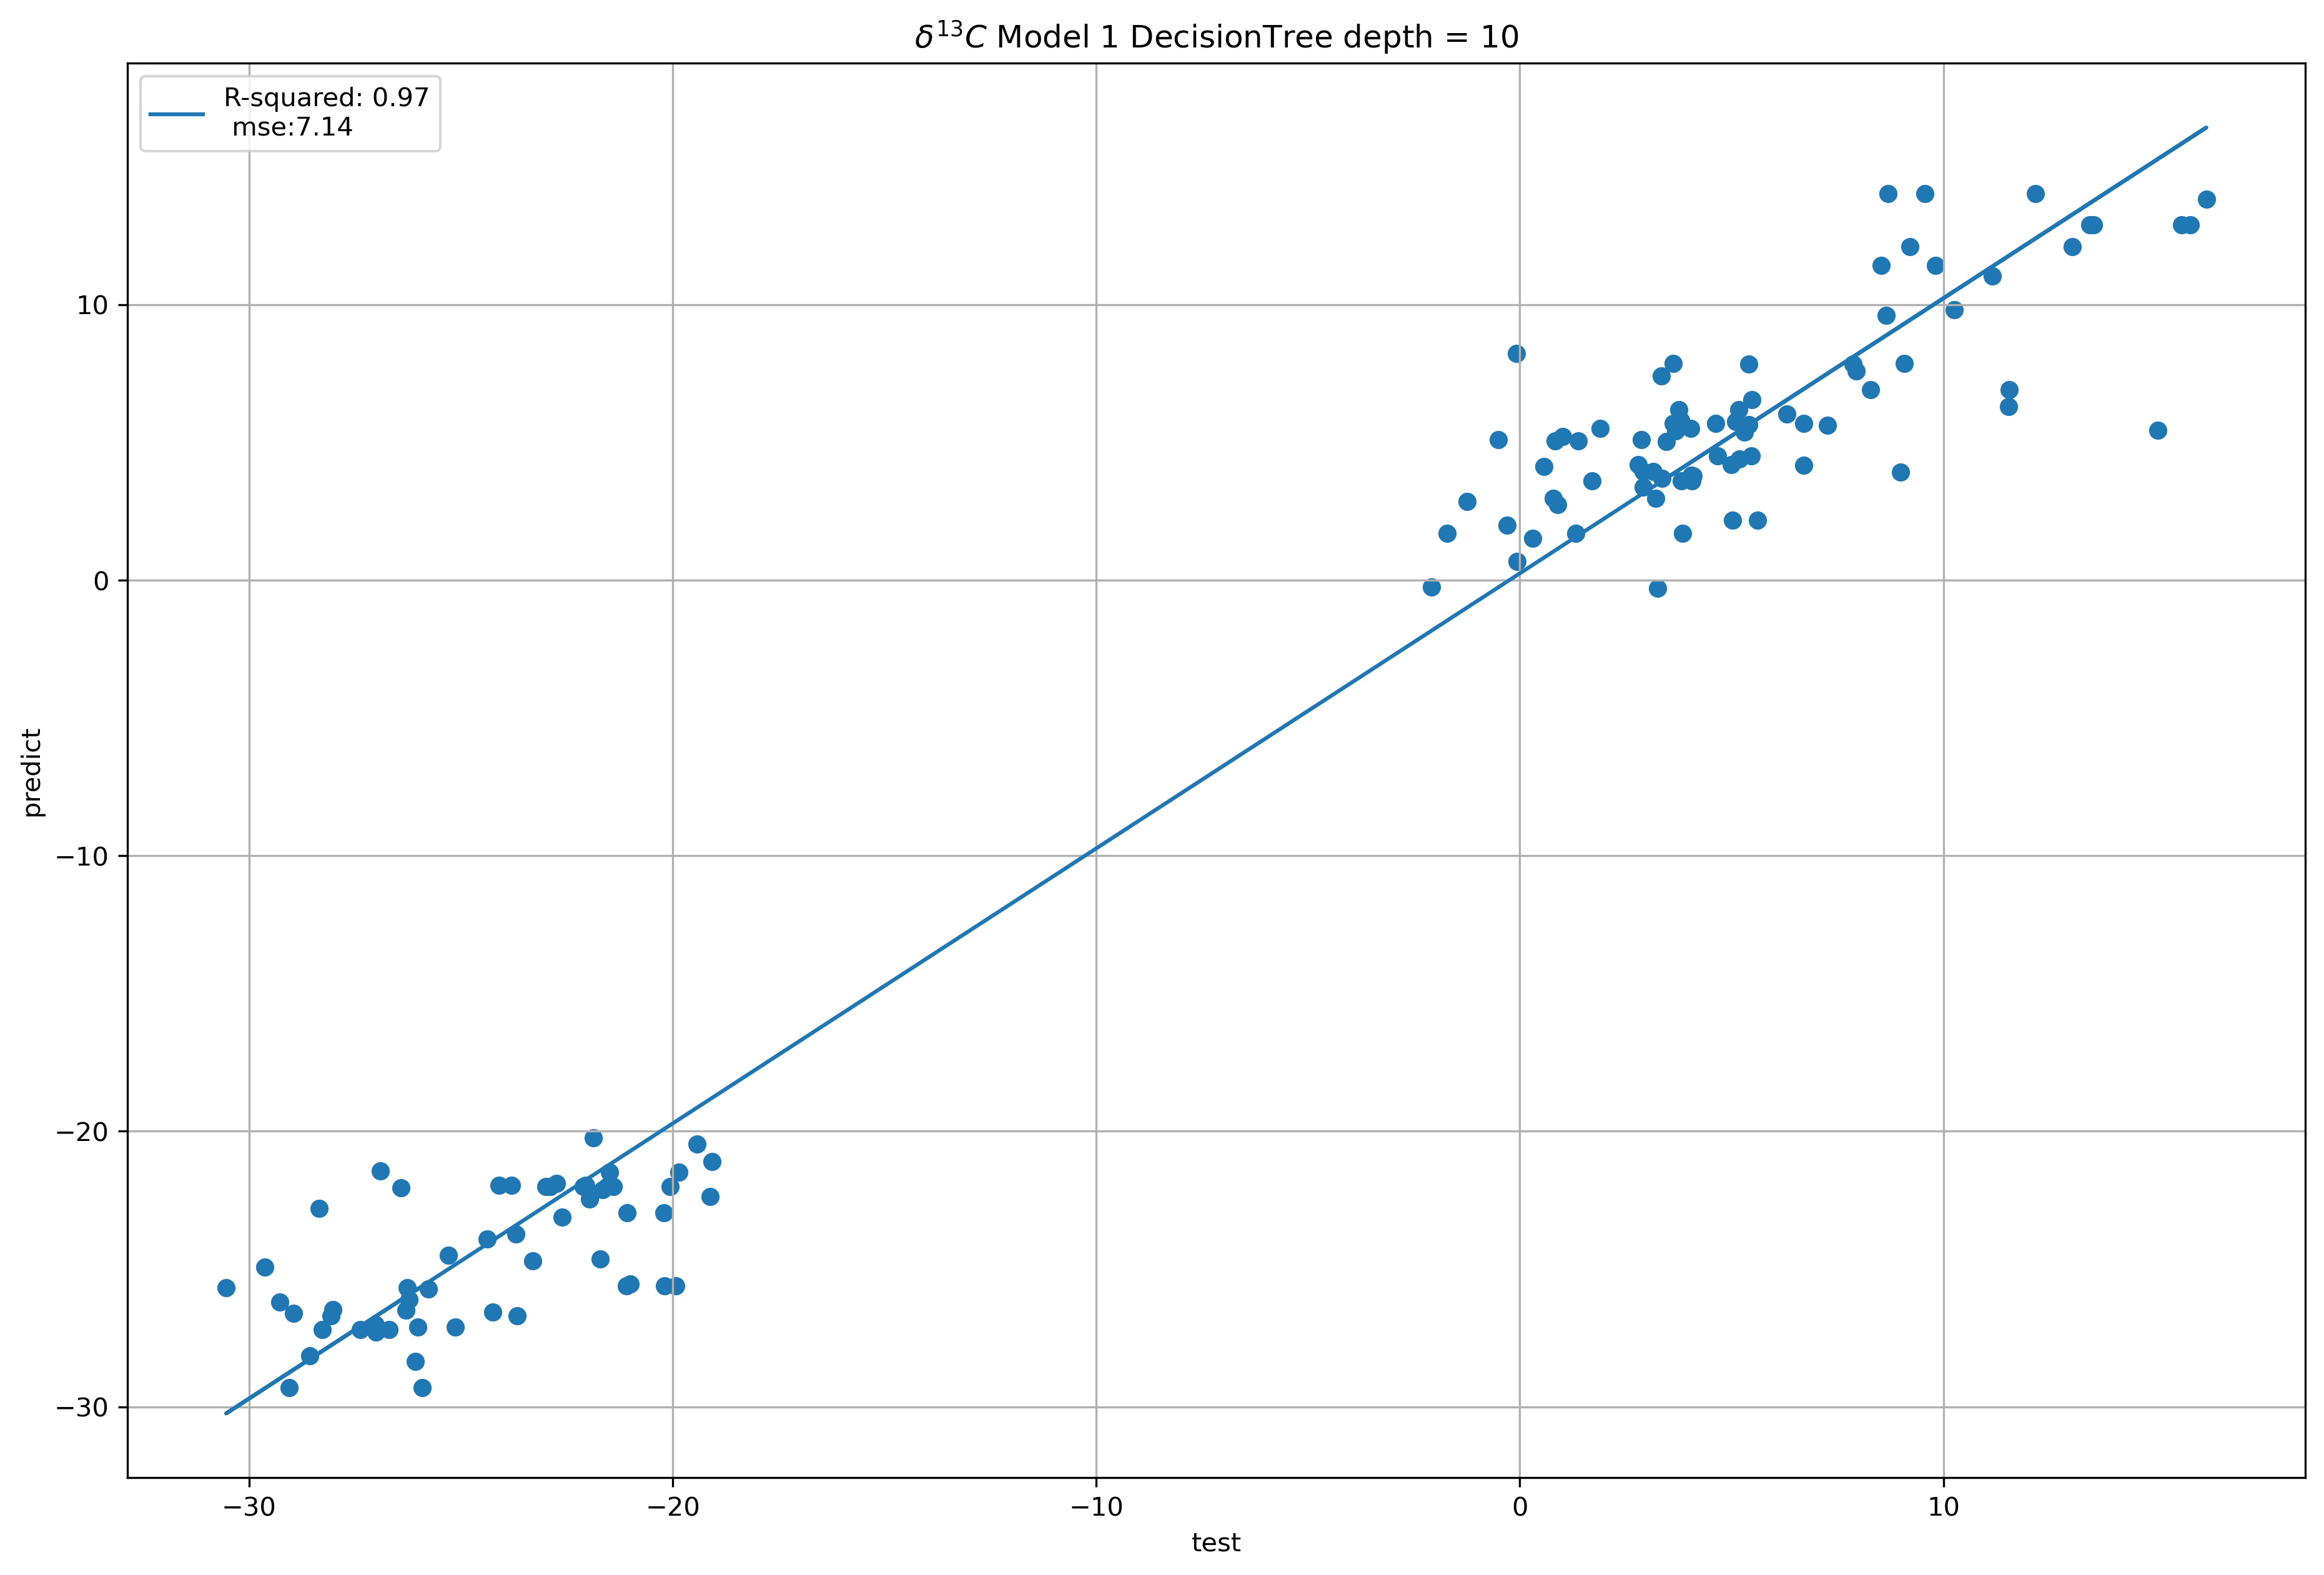

In [115]:
plt.figure(figsize=(15, 10), dpi=300)

fig.suptitle('')
plt.scatter(y_test, y_predict1)
plt.plot(y_test, reg_1.intercept + reg_1.slope*y_test, label = f"R-squared: {reg_1.rvalue**2:.2f}\n mse:{mse1:.2f}")
plt.ylabel('predict')
plt.xlabel('test')
plt.title('$\delta^{13}C$ Model 1 DecisionTree depth = 10')
plt.legend()
plt.grid(True)
plt.savefig('evluacion_modelo_unificado_C.png')

In [46]:
'''import autosklearn
cls = autosklearn.regression.AutoSklearnRegressor()
cls.fit(X_train, y_train)
predictions = cls.predict(X_test)'''

'import autosklearn\ncls = autosklearn.regression.AutoSklearnRegressor()\ncls.fit(X_train, y_train)\npredictions = cls.predict(X_test)'

In [60]:
lreg1_c, lmse1_c, lreg1_n, lmse1_n = [],[],[],[]
for i in tqdm(range(0, 50)):
    X = df[df.keys()[:-1]].values
    y = df['iso'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    model1 = models1.ModelMLP(X_train, y_train)
    model1.fit('tanh')
    y_predict1 = model1.predict(X_test)
    #mask = y_test>0.5
    reg_1_n = linregress(y_test[mask], y_predict1[mask]).rvalue**2
    mse_1_n = mean_squared_error(y_test[mask], y_predict1[mask])
    #mask = y_test<0.5
    reg_1_c = linregress(y_test[mask], y_predict1[mask]).rvalue**2
    mse_1_c = mean_squared_error(y_test[mask], y_predict1[mask])
    lreg1_n.append(reg_1_n)
    #lreg1_c.append(reg_1_c)
    lmse1_n.append(mse_1_n)
    #lmse1_c.append(mse_1_c)


<ipython-input-60-455564da95b8>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(0, 50)):


  0%|          | 0/50 [00:00<?, ?it/s]

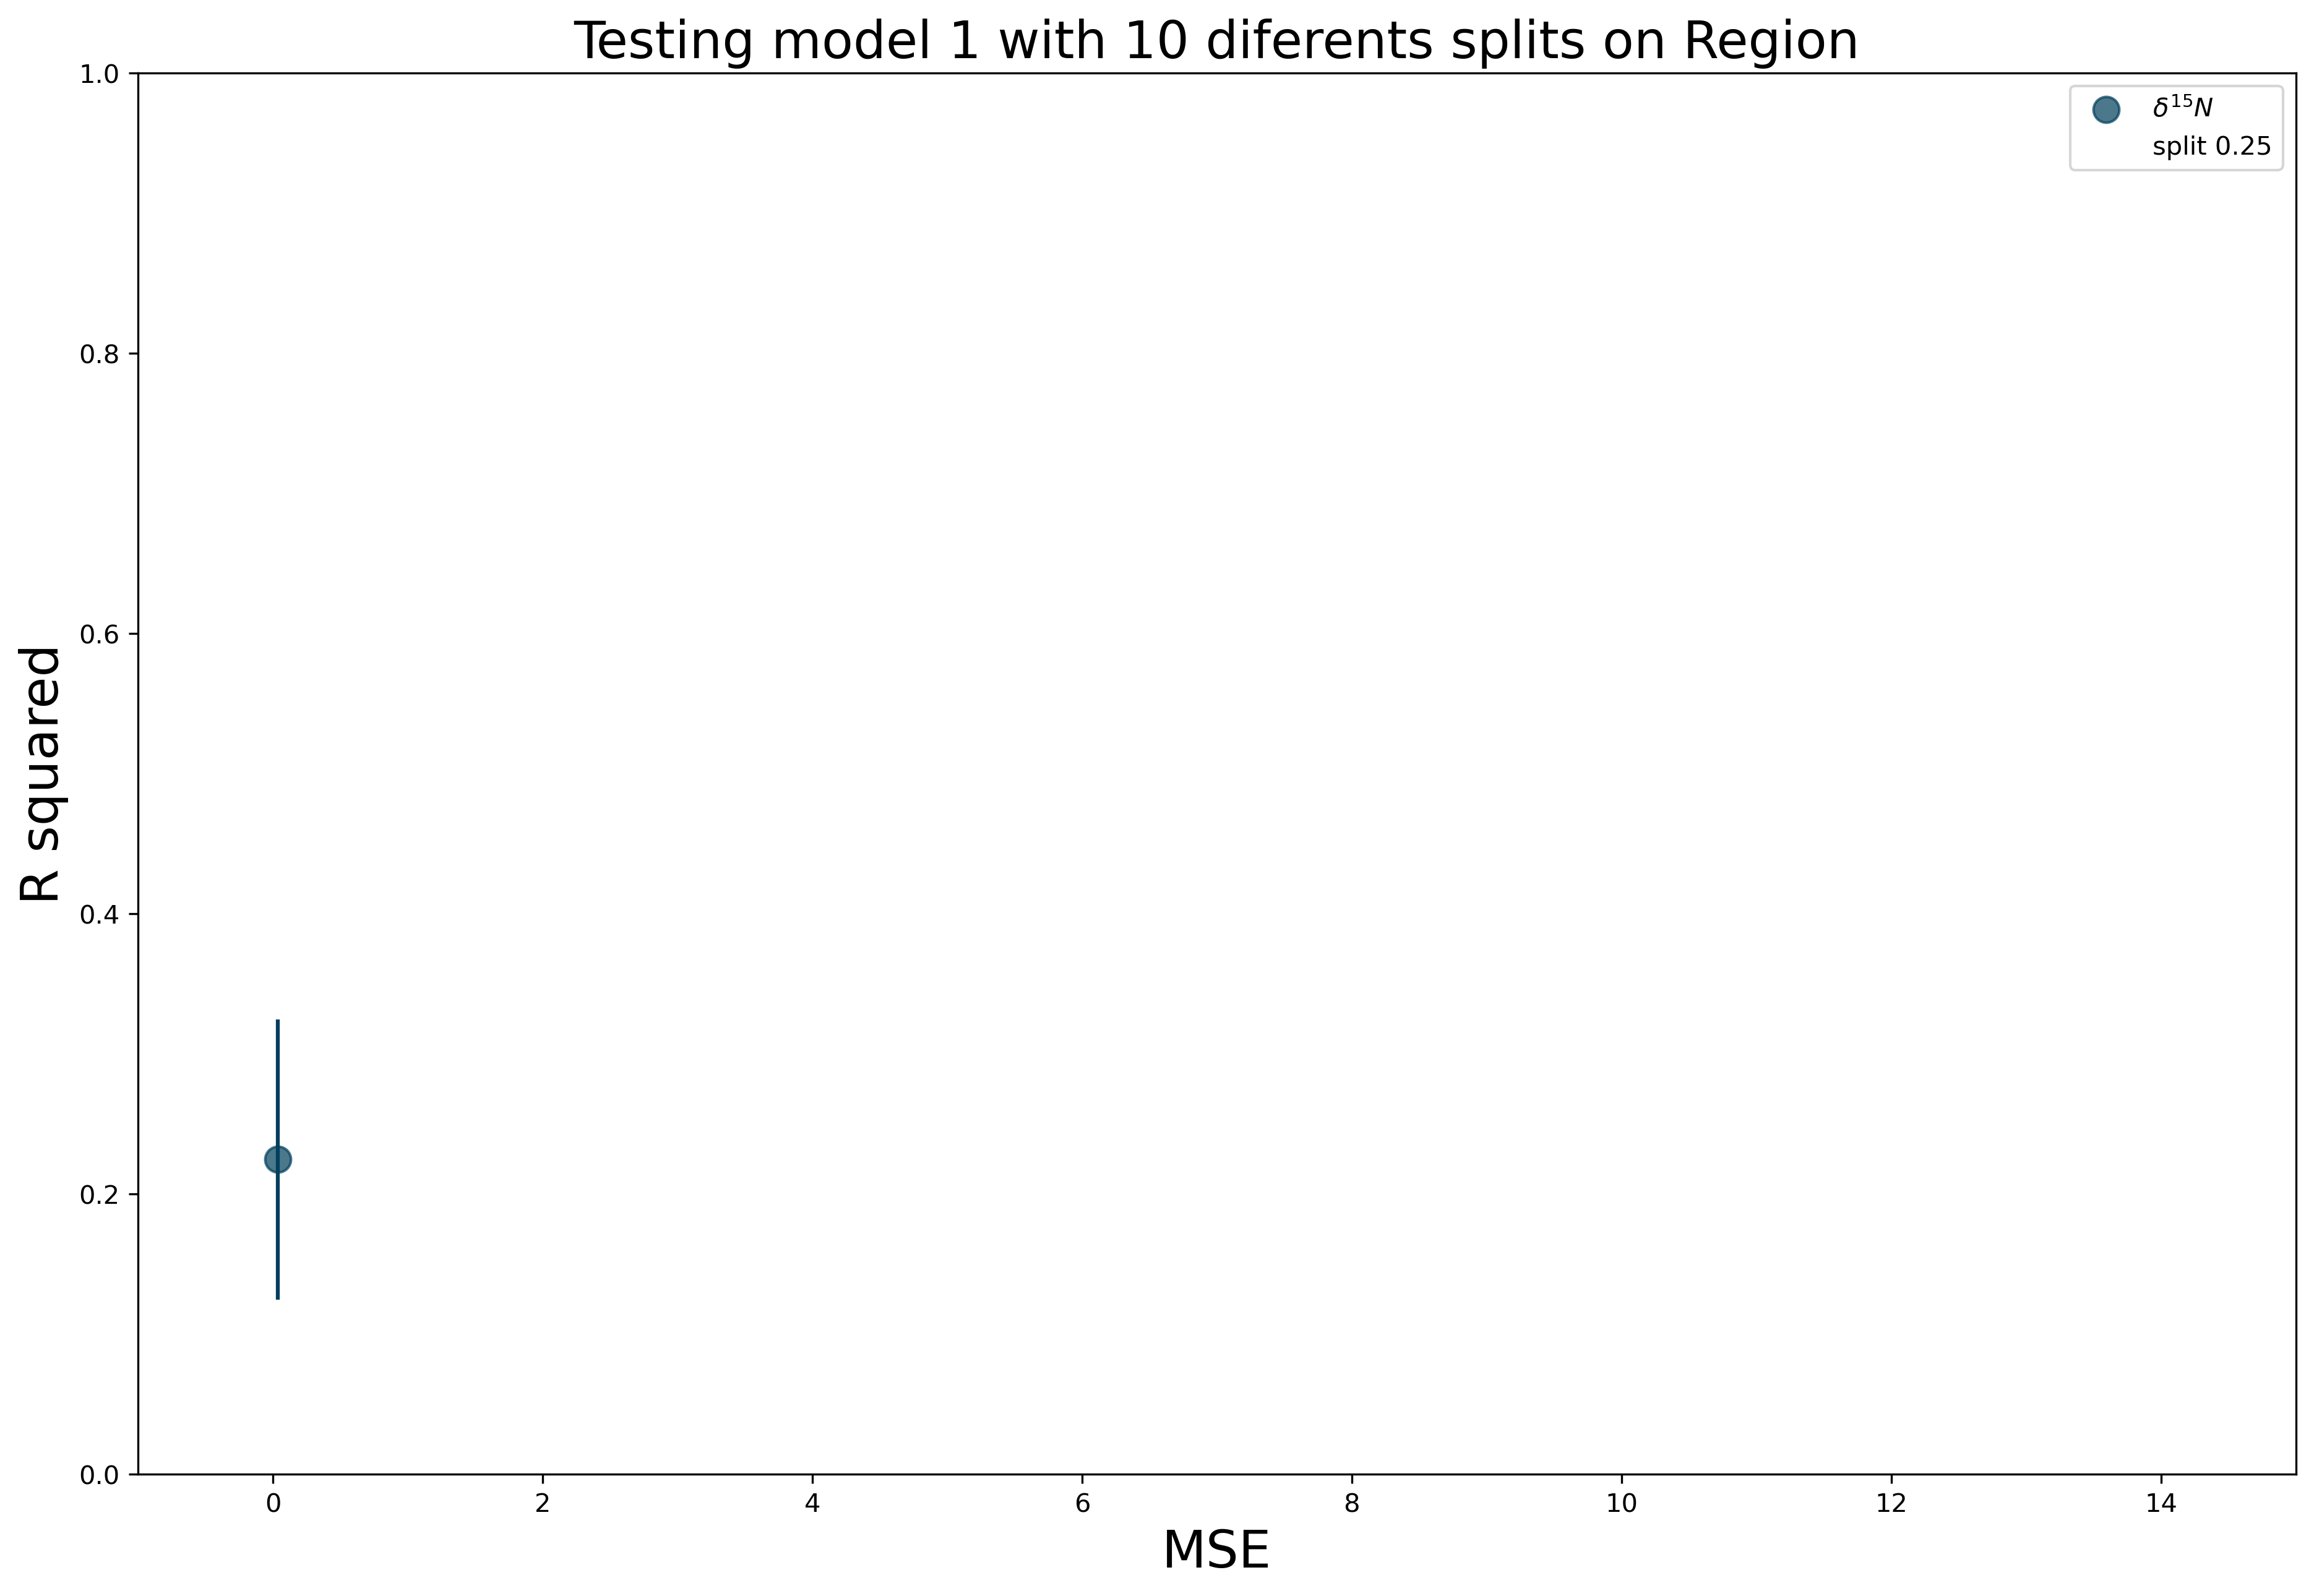

In [61]:
plt.figure(figsize=(15, 10), dpi=300)
plt.title('Testing model 1 with 10 diferents splits on Region', fontsize = 20)######################
color = ['#003f5c', '#58508d', '#bc5090', '#ff6361']

plt.errorbar(np.mean(lmse1_n), np.mean(lreg1_n), xerr=np.std(lmse1_n), yerr=np.std(lreg1_n), c= color[0])
#plt.errorbar(np.mean(lmse1_c), np.mean(lreg1_c), xerr=np.std(lmse1_c), yerr=np.std(lreg1_c), c= color[1])

plt.scatter(np.mean(lmse1_n), np.mean(lreg1_n),label = '$\delta^{15}N $',c= color[0], marker = 'o', s=100, alpha = 0.7)
#plt.scatter(np.mean(lmse1_c), np.mean(lreg1_c),label = '$\delta^{13}C $', c= color[1], marker = 'o', s=100, alpha = 0.7)

plt.scatter([],[],c= 'w', label = 'split 0.25')#################


plt.xlabel('MSE', fontsize = 20)
plt.ylabel('R squared', fontsize = 20)
plt.ylim(0,1)
plt.xlim(-1,15)
plt.legend()
plt.savefig('Region_testing_025_depth10.png')####################################################################

In [39]:
def training_all(X_train, X_test, y_train, y_test, indices_test, df):
    #model 1
    model1 = models1.ModelForest(X_train, y_train)
    model1.fit(10)
    y_predict1 = model1.predict(X_test)
    ev1 = evaluar(y_test, y_predict1, indices_test, df)
    
    #model2
    model2 = models1.ModelMLP(X_train, y_train)
    model2.fit('tanh')
    y_predict2 = model2.predict(X_test)
    ev2 = evaluar(y_test, y_predict2, indices_test, df)
    
    #model3
    model3 = models1.ModelMLP(X_train, y_train)
    model3.fit('relu')
    y_predict3 = model3.predict(X_test)
    ev3 = evaluar(y_test, y_predict3, indices_test, df)
    
    #model4
    model4 = models1.ModelTree(X_train, y_train)
    model4.fit(10)
    y_predict4 = model4.predict(X_test)
    ev4 = evaluar(y_test, y_predict4, indices_test, df)

    
    return ev1, ev2, ev3, ev4

In [80]:
import random

def split(X, y):
    
    indices = list(range(0, len(y)))
    X = X.values
    y = y.values
    indices = random.sample(indices, len(indices))
    indices_test= indices[0:135]
    indices_train = indices[134:]
    X_train, X_test, y_train, y_test = [],[],[],[]
    for i in indices_train:
        X_train.append(X[i])
        y_train.append(y[i])
    
    for i in indices_test:
        X_test.append(X[i])
        y_test.append(y[i])
    
    return  X_train, X_test, y_train, y_test, indices_test
    

In [67]:
def evaluar(y_test, y_predict, indices_test, df):
    plant_c_test, plant_c_, plant_n_test, plant_n_, soil_c_test, soil_c_, soil_n_test, soil_n_ = [],[],[],[],[],[],[],[]
    
    for i, j in zip(indices_test, list(range(0,len(y_test)))):

        if df['planta'].values[i]==1 and df['N'].values[i]==1:
            plant_n_test.append(y_test[j])
            plant_n_.append(y_predict[j])
            
        elif df['planta'].values[i]==1 and df['C'].values[i]==1:
            plant_c_test.append(y_test[j])
            plant_c_.append(y_predict[j])
            
        elif df['suelo'].values[i]==1 and df['C'].values[i]==1:
            soil_c_test.append(y_test[j])
            soil_c_.append(y_predict[j])
            
        elif df['suelo'].values[i]==1 and df['N'].values[i]==1:
            soil_n_test.append(y_test[j])
            soil_n_.append(y_predict[j])  
            
    reg_plant_c, mse_plant_c= ev(plant_c_test, plant_c_)
    reg_plant_n, mse_plant_n= ev(plant_n_test, plant_n_)
    reg_soil_c, mse_soil_c= ev(soil_c_test, soil_c_)
    reg_soil_n, mse_soil_n= ev(soil_n_test, soil_n_)
    
    return [reg_plant_c.rvalue**2, mse_plant_c, reg_plant_n.rvalue**2, mse_plant_n, reg_soil_c.rvalue**2, mse_soil_c, reg_soil_n.rvalue**2, mse_soil_n]


In [16]:
def ev(y_test, y_predict):
    reg = linregress(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    return reg, mse

In [47]:
a =list(range(0, 50))
a = random.sample(a, len(a))

In [50]:
np.shape(np.unique(a))

(50,)

In [49]:
n=0
for i in range(0, 50):
    if i in a:
        n+=1
print(n)

50
